<a href="https://colab.research.google.com/github/kreshuklab/teaching-dl-course-2023/blob/main/webinar1/image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation Tutorial

We are going to work with Kaggle 2018 Data Science Bowl data.  
To start with go the [data webpage](https://www.kaggle.com/c/data-science-bowl-2018) and read the data description. To make it easier, we're going to work with a subset of it [stage1_train.zip](https://www.kaggle.com/competitions/data-science-bowl-2018/data?select=stage1_train.zip) 

## Download the original files from Kaggle.com

1. Create and account in Kaggle and obtain a Kaggle API token under your account settings [Settings](https://www.kaggle.com/settings)
2. Place your .json token in C:\Users\<Windows-username>\.kaggle\kaggle.json. See [Kaggle API config instructions](https://github.com/Kaggle/kaggle-api)
3. Using Kaggle API you can directly download the dataset using the bash command below:

In [10]:
# We will only download the stage_train.zip file (-f) within the data-science-bowl-2018.zip dataset 
# Path where the files will be downloaded is defined with -p
!kaggle competitions download -c data-science-bowl-2018 -f stage1_train.zip -p "../dl-course-data/webinar1"


  0%|          | 0.00/79.1M [00:00<?, ?B/s]
  1%|▏         | 1.00M/79.1M [00:00<00:57, 1.43MB/s]
  3%|▎         | 2.00M/79.1M [00:00<00:27, 2.89MB/s]
  5%|▌         | 4.00M/79.1M [00:00<00:12, 6.19MB/s]
 10%|█         | 8.00M/79.1M [00:01<00:05, 13.1MB/s]
 15%|█▌        | 12.0M/79.1M [00:01<00:03, 18.7MB/s]
 20%|██        | 16.0M/79.1M [00:01<00:02, 23.4MB/s]
 25%|██▌       | 20.0M/79.1M [00:01<00:02, 25.0MB/s]
 30%|███       | 24.0M/79.1M [00:01<00:02, 28.2MB/s]
 35%|███▌      | 28.0M/79.1M [00:01<00:01, 30.1MB/s]
 40%|████      | 32.0M/79.1M [00:01<00:01, 32.3MB/s]
 46%|████▌     | 36.0M/79.1M [00:01<00:01, 33.5MB/s]
 51%|█████     | 40.0M/79.1M [00:02<00:01, 34.5MB/s]
 56%|█████▌    | 44.0M/79.1M [00:02<00:01, 35.5MB/s]
 61%|██████    | 48.0M/79.1M [00:02<00:00, 36.2MB/s]
 66%|██████▌   | 52.0M/79.1M [00:02<00:00, 28.4MB/s]
 71%|███████   | 56.0M/79.1M [00:02<00:00, 30.7MB/s]
 76%|███████▌  | 60.0M/79.1M [00:02<00:00, 29.3MB/s]
 82%|████████▏ | 65.0M/79.1M [00:02<00:00, 33.4MB/s]
 

Alternatively download the file subset from [this link](https://www.kaggle.com/competitions/data-science-bowl-2018/data?select=stage1_train.zip) and place them inside "../dl-course-data/webinar1"

## Working with local files

Data used in webinars is already downloaded and in my case its in a folder (dl-course-data) at the same level as teaching-dl-course-2023 folder containing all jupyter notebooks `../dl-course-data/`

In [12]:
import os # For folder related operations
# Define the directory containing the data
data_dir = "../dl-course-data/webinar1"
# Make sure the directory is accessible and contains the kaggle_data.zip file 
os.listdir(data_dir)

['stage1_train.zip']

In [13]:
# Create a directory named nuclei_data that will contain all the extracted files
os.makedirs(f"{data_dir}/nuclei_data")

Remember that you can execute any bash command from the Notebook if you preceed the command name with '!'. You can look into WSL2 if you want to use Linux bash commmands on a Windows system.
We aware not all bash commands from Linux work in a Windows system.
Use { } to insert Python variables into bash commands:

In [14]:
# Unzips stage_train.zip into {data_dir}/nuclei_data/ and deletes the zip file after completing extraction
!unzip -qq {data_dir}/stage1_train.zip -d {data_dir}/nuclei_data/ && rm {data_dir}/stage1_train.zip

## Downloading the data - Colab 
If you work with these notebooks using Colab or other environment, you can download data to any location, for example, in the current directory.

In [ ]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
    data_dir = "./"
else:
    raise RuntimeError("Skip the entire section 'Downloading the data - Colab' since not running on Google Colab.")

Now let's download the data.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1O66UElt2ZfhLXUKKX_nTxmIXh6fMA2rT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1O66UElt2ZfhLXUKKX_nTxmIXh6fMA2rT" -O {data_dir}/kaggle_data.zip && rm -rf /tmp/cookies.txt

SyntaxError: invalid syntax (4157648802.py, line 1)

And please check whether the downloaded archive is around 80M (the value after the progress bar [ <=> ]). If the value is much smaller, rerun the previous cell - probably something failed. 

Those of you who like bash can play around with unzipping the data into nice folders. The rest of you can just run the following:


In [ ]:
!unzip -qq {data_dir}/kaggle_data.zip -d {data_dir} && rm {data_dir}/kaggle_data.zip && rm {data_dir}/stage1_test.zip
!mkdir {data_dir}/nuclei_data && unzip -qq {data_dir}/stage1_train.zip -d {data_dir}/nuclei_data/ && rm {data_dir}/stage1_train.zip

## Check the data

Don't forget that you can always check what is happening in your directory using `ls` :

In [15]:
!ls {data_dir}

nuclei_data


In [16]:
!ls {data_dir}/nuclei_data

00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed
01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf
0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21
0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426
02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339
03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776
03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe
03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a
0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd
04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e
05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13
0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275
05a8f65ebd0b30d3b210f30b4

Wow, that was a loooot of folders. Hint: you can clear the output of the cell by clicking the 'clear output' button below the 'run cell'.

Now let's check what they contain by taking one random folder name:




In [19]:
!ls {data_dir}/nuclei_data/ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48

images
masks


In [20]:
!ls {data_dir}/nuclei_data/ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48/images

ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48.png


Okay, this one contains a png image with the same name of the folder that contains it. __TASK:__ Check other random folder names to make sure the structure is the same.

## Displaying images

Now we want to load some pictures and look at them. For this we would need the following libraries:

In [21]:
# We want to show images directly in the notebook using %matplotlib inline
%matplotlib inline
import numpy as np    # Scientific computing 
import matplotlib.pyplot as plt   # Plotting and visualisation
import scipy
import skimage    # Image processing library, works with images as numpy arrays
import skimage.feature
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.transform
plt.rcParams['figure.figsize'] = [12, 8]  # Set default figure size for matplotlib plots

c:\Users\albertds\mambaforge\envs\EMBL_keras\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\albertds\mambaforge\envs\EMBL_keras\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\albertds\mambaforge\envs\EMBL_keras\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [22]:
# Let's load a random image 
image_path = os.path.join(data_dir, 'nuclei_data/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5/images/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5.png')
image = skimage.io.imread(image_path)

In [23]:
# Since images are read as numpy arrays, we can check their shape and data type numpy-style
print(image.shape) # Note that this is an RGBA image (has 4 channels)
print(image.dtype)

(256, 320, 4)
uint8


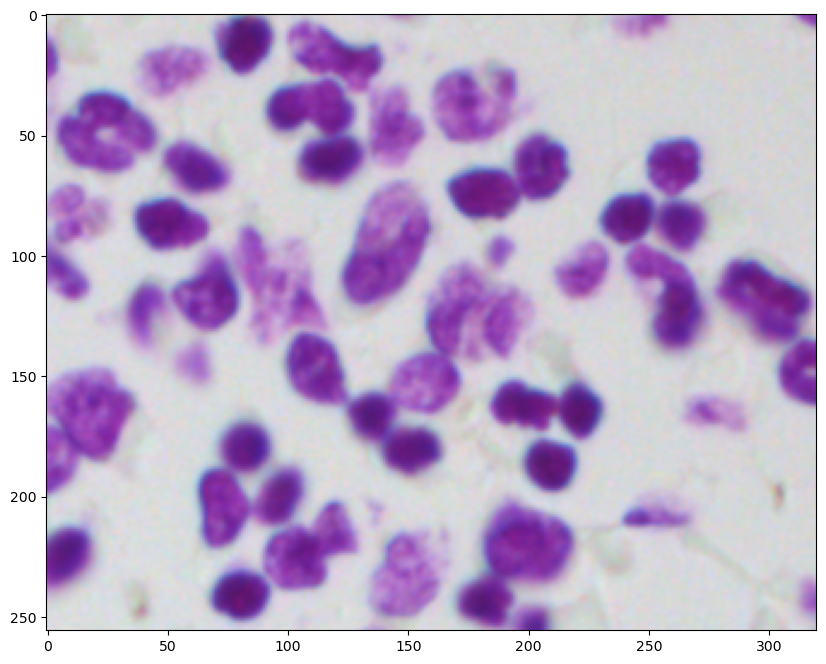

In [24]:
# Now let's visualize the image
plt.imshow(image)

If we want to have a better overview of what is happening in the folder, loading the images one by one is not the best approach. What we will do now is list all the folders we have, and write a function that will load an image file from a random folder.

In [25]:
nuclei_data_path = os.path.join(data_dir, 'nuclei_data')
folders_list = os.listdir(nuclei_data_path)  # get the list of all the folders inside nuclei_data
print(folders_list[0])   # let's see how the folder names look like

00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552


In [72]:
# Checking access to the directories
!ls {nuclei_data_path}/{folders_list[3]}

images
masks


In [77]:
def show_random_image(dir_list):
  rand_idx = np.random.randint(0, len(dir_list)) # Get a random index
  rand_folder = dir_list[rand_idx]
  # We can define the img_path using f strings, but when switching from Windows to Linux-based directories this causes problems
  img_path = f"{data_dir}/nuclei_data/{rand_folder}/images/{rand_folder}.png" # TASK: what would be the image path here?
  # An alternative is using os.path.join (this will rewrite the img_path variable)
  img_path = os.path.join(data_dir, 'nuclei_data',rand_folder,'images',f'{rand_folder}.png')
  random_image = skimage.io.imread(img_path)
  plt.imshow(random_image)

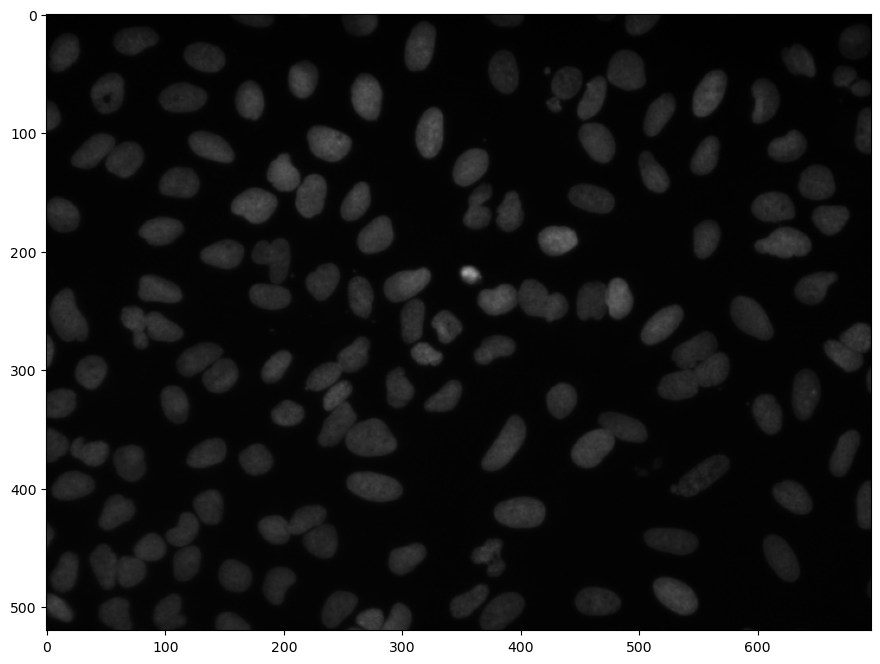

In [86]:
# Now test your function and see how the images in your folder look like
show_random_image(folders_list)

## Operations on images

Now let's look more into the operations that you can perform on your image. Firstly, let's write a function that visualises two images at the same time to examine the transformations visually.

In [93]:
def show_two_images(image1, image2):
    # Creates a figure object f and an array of two axes objects axarr.
    # The plt.subplots(1, 2) function is used to create a single row with two columns for the two images to be displayed side by side.
    f, axarr = plt.subplots(1, 2)   
    axarr[0].imshow(image1)
    axarr[1].imshow(image2)
    # Remove the axis ticks
    for ax in axarr:
        ax.axis('off')
    # _ = [ax.axis('off') for ax in axarr]   # Remove axis, but with list comprehension (need to create a mock list)
    plt.show()

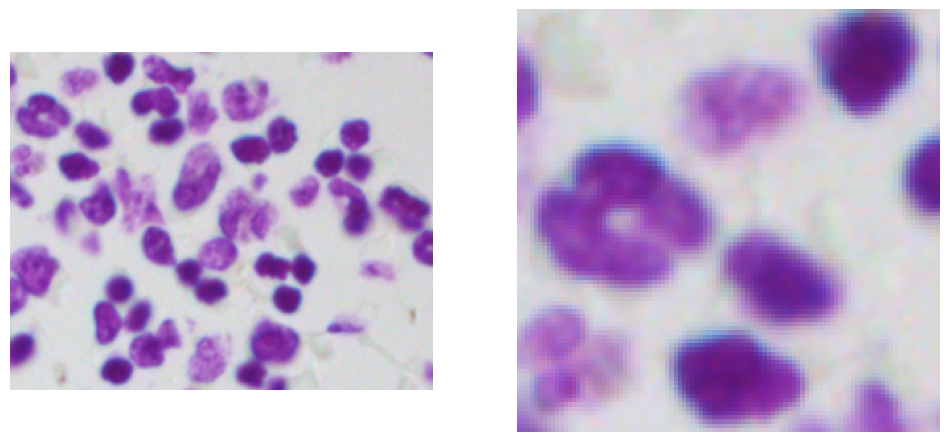

In [94]:
# Now let's crop the upper left corner of the image and visualize it next to the original image
show_two_images(image, image[:100, :100])

Looks fine. Now let's go through some common image transformations.

## Converting to grayscale
If you have looked through enough random images from the folder, you might have noticed some of them are colored and some are gray-scale. If we want to build a generic pipeline that processes all of them, we might need to convert the coloured ones to grayscale as well. Also, we will invert the image to have 0 as background and 1 as signal

In [48]:
# The example image is a RGBA image (ndarray of shape (256, 320, 4))
# Explanation of RGB vs RGBA: https://www.w3schools.com/html/html_colors_rgb.asp
# Before transforming it into a grayscale image we first need to move from RGBA to RGB
print(f"The original RGBA image ndarray shape is: {image.shape}")
rgb_image = skimage.color.rgba2rgb(image)
print(f"After transformation into RGB: {rgb_image.shape}")

The original RGBA image ndarray shape is: (256, 320, 4)
After transformation into RGB: (256, 320, 3)


In [95]:
# Then we can transform the RGB image into a grayscale image with only one channel
grey_image = skimage.color.rgb2gray(rgb_image)
print(f"Grayscale image ndarray shape: {grey_image.shape}") # Now we see that the 4 channels are gone

Grayscale image ndarray shape: (256, 320)


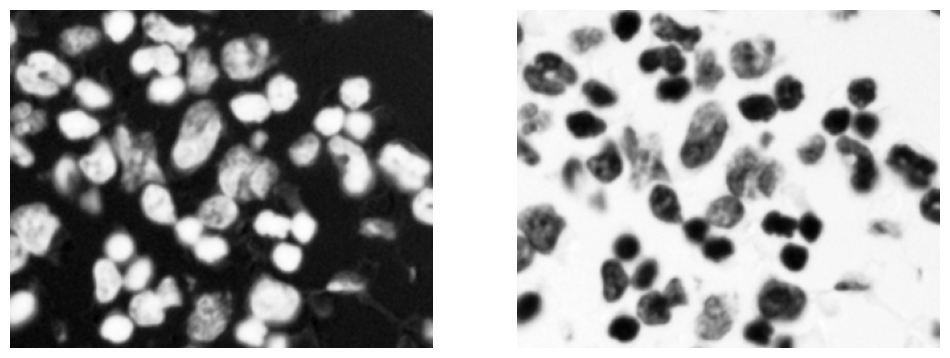

In [96]:
# Redefine the function using "Greys" as colormap to show the effect of inverting the grayscale values
def show_grey_images(image1, image2):
    f, axarr = plt.subplots(1, 2)   # We need two images in a row
    axarr[0].imshow(image1, cmap="Greys")
    axarr[1].imshow(image2, cmap="Greys")
    _ = [ax.axis('off') for ax in axarr]   # Remove the axis ticks
    plt.show()
    
# Invert the image to have 0 as background and 1 as signal 
# Before inverting the grayscale values nuclei are dark pixels (close to 0 values) and the background are white pixels (close to 1 values)
inverted = 1 - grey_image
show_grey_images(grey_image, inverted)

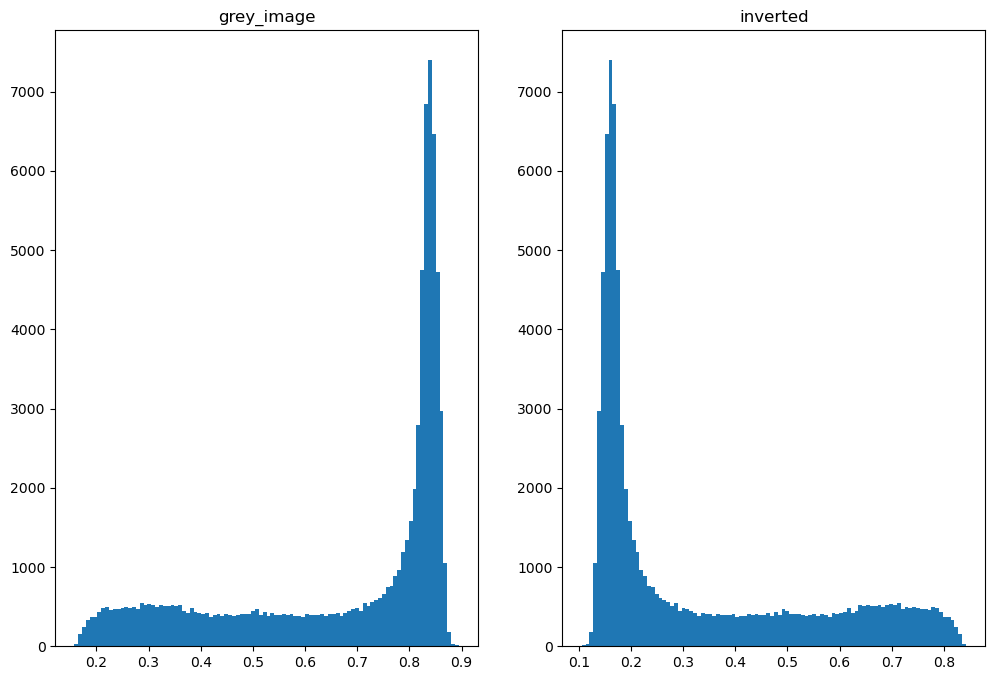

In [103]:
# Plot a side by side histogram to show the effect of inverting the grayscale values
def show_histograms(image1, image2):
    f, axarr = plt.subplots(1, 2)   # We need two plots in a row
    axarr[0].hist(image1.flatten(), bins=100)
    axarr[0].set_title('grey_image')
    axarr[1].hist(image2.flatten(), bins=100)
    axarr[1].set_title('inverted')
    plt.show()

show_histograms(grey_image, inverted)

In [110]:
# Roughly calculate the percentage of how much of the grey_image is background or signal (we'll threshold later)
# Count how many values are below 0.7 in the grey_image array
background = np.count_nonzero(grey_image < 0.7)
# Count how many values are above 0.7 in the grey_image array
signal = np.count_nonzero(grey_image > 0.7)
print(f"{round(background/grey_image.size * 100)}% of the image is background")
print(f"{round(signal/grey_image.size * 100)}% of the image is nuclei signal")


38% of the image is background
62% of the image is nuclei signal


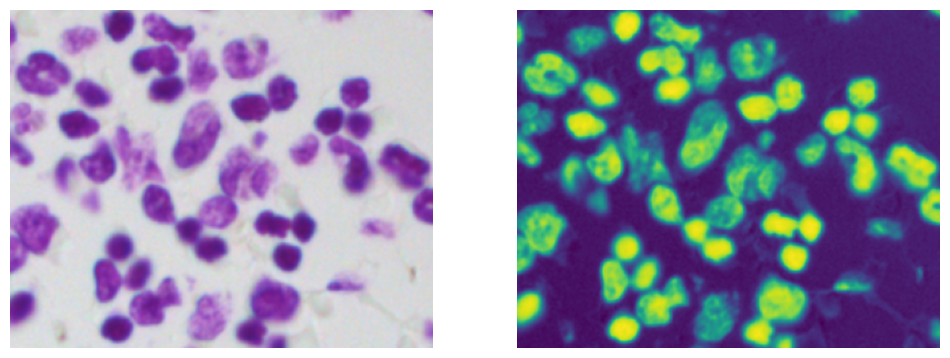

In [111]:
# Invert the image to have 0 as background and 1 as signal this time overwritting the grey_image variable
grey_image = 1 - grey_image
show_two_images(image, grey_image)

As you can see from the second image, by default matplotlib is using 'viridis' colormap to display grayscale images. 

**TASK**: change the cmap parameter in `imshow` function to display the second image in greyscale (use 'Greys' colormap)

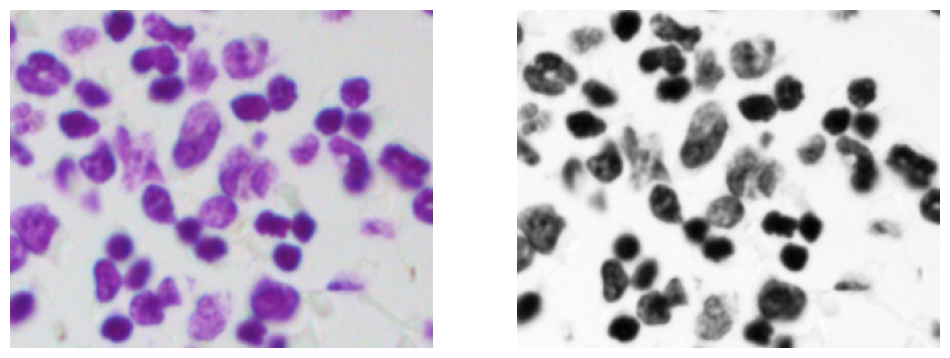

In [112]:
# Redefine the function using "Greys" as colormap
def show_two_images(image1, image2):
    f, axarr = plt.subplots(1, 2)   # we need two images in a row
    axarr[0].imshow(image1)
    axarr[1].imshow(image2, cmap="Greys")
    _ = [ax.axis('off') for ax in axarr]   # remove the axis ticks
    plt.show()
    
show_two_images(image, grey_image)

## Rescaling image
Rescale operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis.

(512, 640)


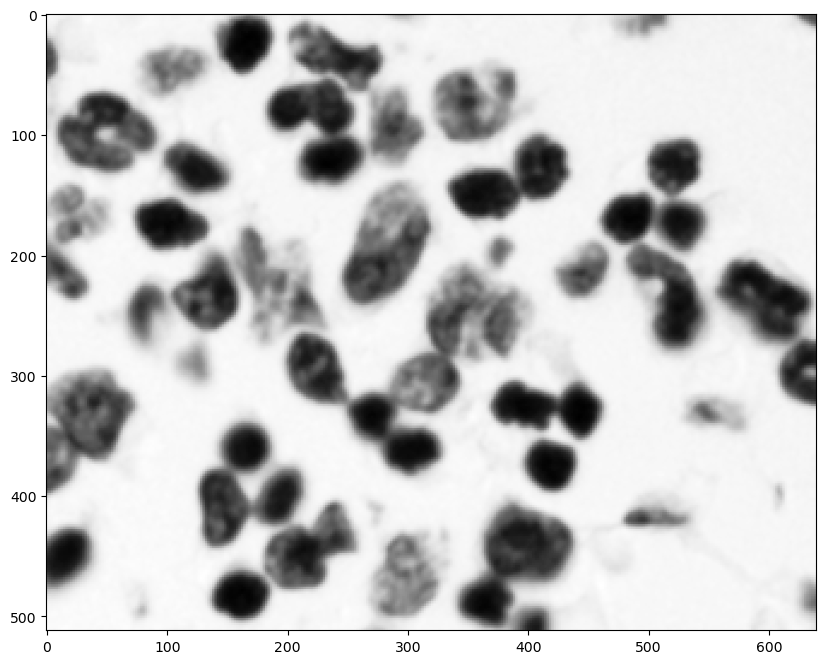

In [113]:
rescaled_image = skimage.transform.rescale(grey_image, scale=2, order=0)
print(rescaled_image.shape) # The image now is twice larger 
plt.imshow(rescaled_image, cmap='Greys')

**TASK** : try different interpolation orders. Which orders produce smoother images? 

Hint: for visualization crop small regions of the image to see more subtle differences (e.g. `show_two_images(img1[:100, :100], img2[:100, :100])`) 

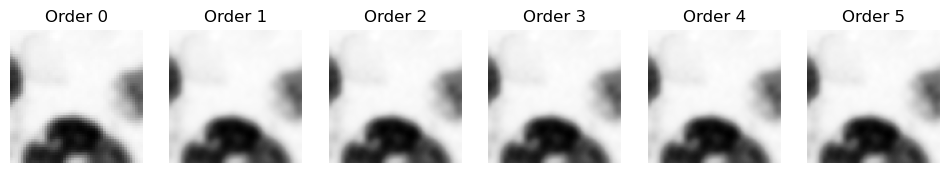

In [114]:
fig, ax = plt.subplots(ncols=6, figsize=(12, 4))

for i in range(6):
    # Rescale the image
    rescaled_image = skimage.transform.rescale(grey_image, scale=2, order=i)
    # Remove axis from the image
    ax[i].axis("off")
    # Display the rescaled image in the i-th subplot
    ax[i].imshow(rescaled_image[:100, :100], cmap='Greys') #Cropping of small regions
    # Set subplot title to the order used for rescaling
    ax[i].set_title(f"Order {i}")
    
plt.show()

**TASK** : find an skimage function that does the same as rescale, but instead of scale factor accepts output shape as a parameter 

In [142]:
# Resize serves the same purpose as rescale, but allows to specify an output image shape instead of a scaling factor
resizing_factors = [2, 4, 6, 12]
resized_images = []

for i in resizing_factors:
    # Rescale the image
    resized_image = skimage.transform.resize(grey_image, (grey_image.shape[0] // i, grey_image.shape[1] // i), anti_aliasing=True)
    # resized_image = resized_image[:100, :100]
    resized_images.append(resized_image)


Advanced **TASK**: modify `show_two_images` to show n images - given a list of any number of images the function should plot all of them in a row. Visualise multiple resized images at the same time.

In [143]:
def show_images(image_list):
    f, ax = plt.subplots(ncols=len(image_list))
    i = 0  
    for image in image_list: #Iterate over images in the list
        ax[i].axis("off")
        # Display the rescaled image in the i-th subplot
        ax[i].imshow(image)
        # Set subplot title to image_list index 
        ax[i].set_title(f"Image {i}")
        i += 1
        
    plt.show()

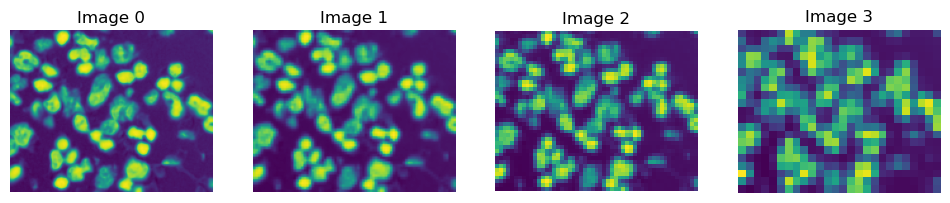

In [144]:
show_images(resized_images)

## Flipping image

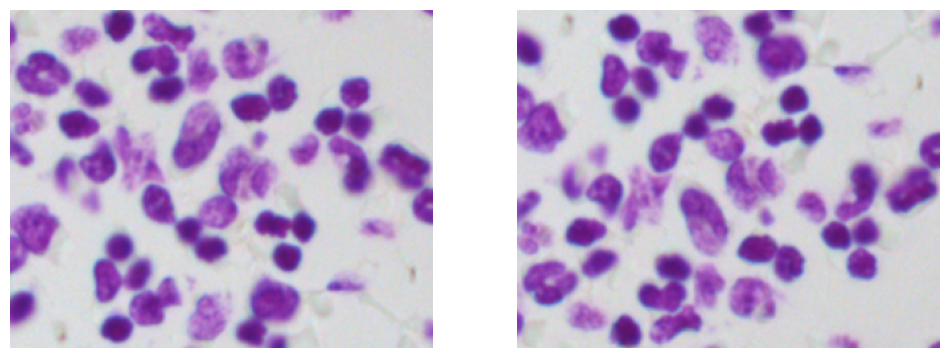

In [148]:
# By switching the axis, you flip along the horizontal (0) or vertical axis (1)
flipped_image = np.flip(image, axis=0)
show_two_images(image, flipped_image)

## Rotating image 

**TASK**: use `skimage.transform.rotate` to rotate your image and visualise it


**TASK**: write a function that given an image and a number N will rotate the image by a random angle in range (0, N) degrees

In [149]:
def rotate_x_degrees (image, angle):
  random_angle =  np.random.randint(0, angle) # Angle randomizer
  print(f"Random angle: {random_angle}°")
  rotated_image = skimage.transform.rotate (image, random_angle)
  return rotated_image

Random angle: 57°


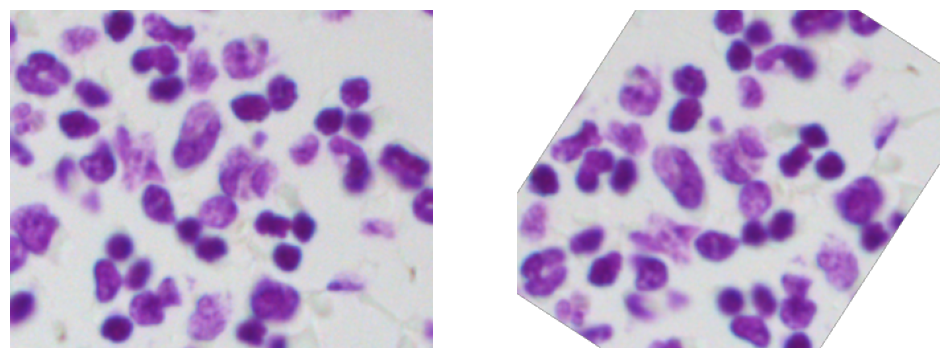

In [156]:
# Your code here
rotated_image = rotate_x_degrees (image, 180)#  Your code here
show_two_images(image, rotated_image)


## Thresholding image
In simple cases you can get an object mask (segment your object) using plain thresholding + connected components. Let's see how good it works for our images. Note, that here we will work on the greyscale version

In [181]:
def show_three_images(image1, image2, image3):
    f, axarr = plt.subplots(1, 3)   # We need two images in a row
    axarr[0].imshow(image1, cmap="Greys")
    axarr[1].imshow(image2, cmap="Greys")
    axarr[2].imshow(image3, cmap="nipy_spectral") # Task: change the cmap parameter in imshow function to display the second image in "nipy_spectral" colormap)
    for ax in axarr:  
      ax.axis('off')   # Remove the axis ticks
    plt.show()

Threshold: 0.5


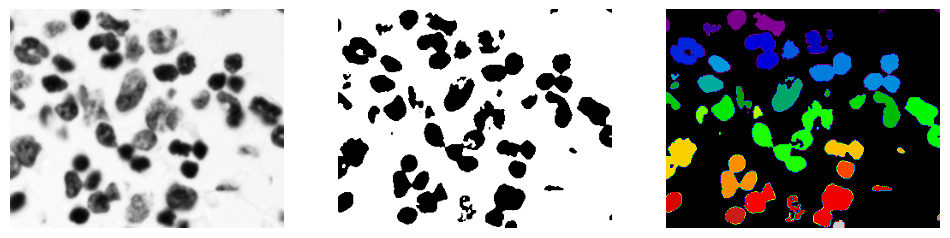

In [183]:
threshold = 0.50
thresholded_image = grey_image > threshold # Numpy operation on arrays (ndarrays)
cells_labels = skimage.measure.label(thresholded_image) # Label connected regions of an integer array (measure.label)
print (f"Threshold: {threshold}")
show_three_images(grey_image, thresholded_image, cells_labels)

**TASK** : try different thresholds. Do you manage to get the objects properly separated? 

Threshold: 0.1


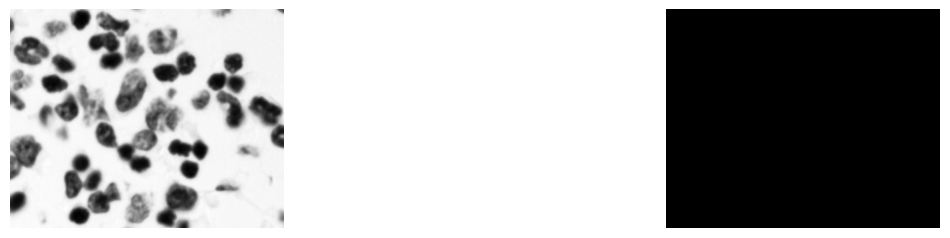

Threshold: 0.15


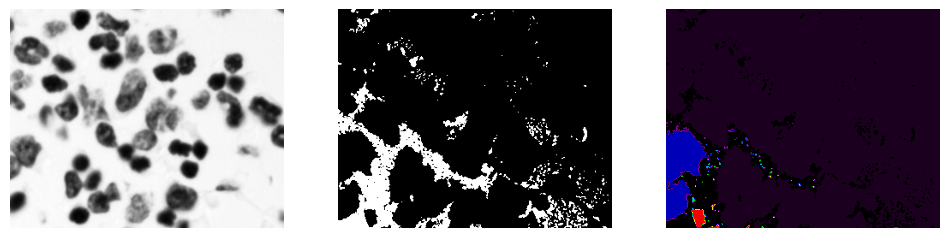

Threshold: 0.2


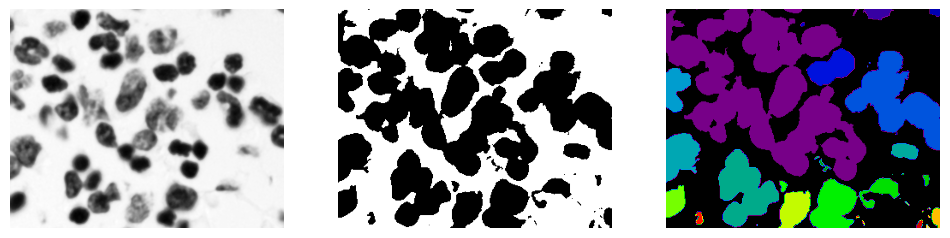

Threshold: 0.25


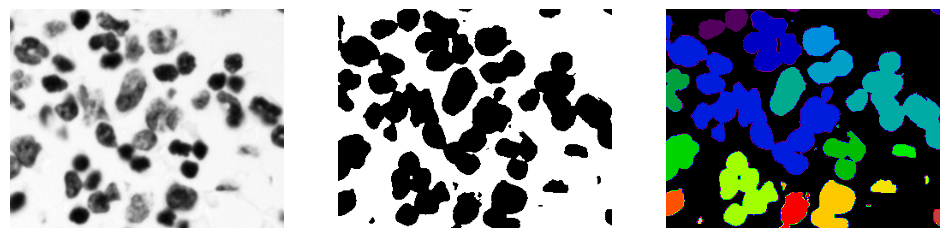

Threshold: 0.3


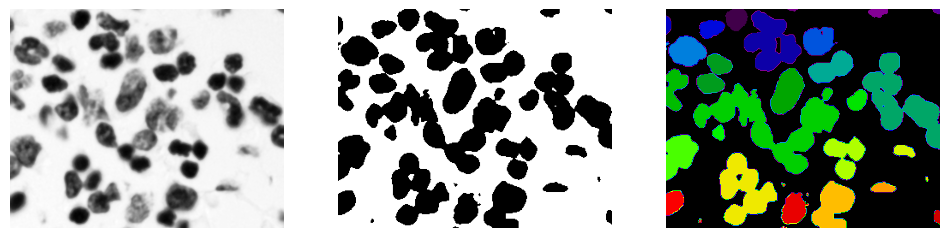

Threshold: 0.35


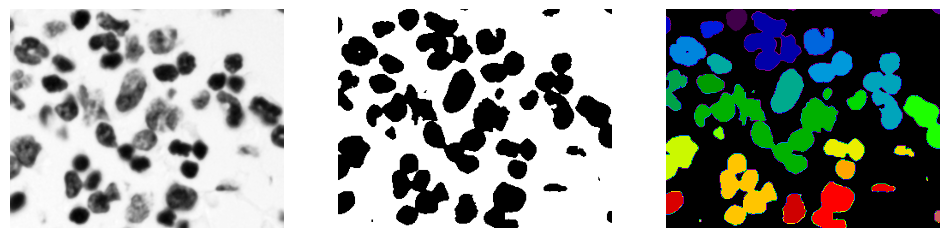

Threshold: 0.4


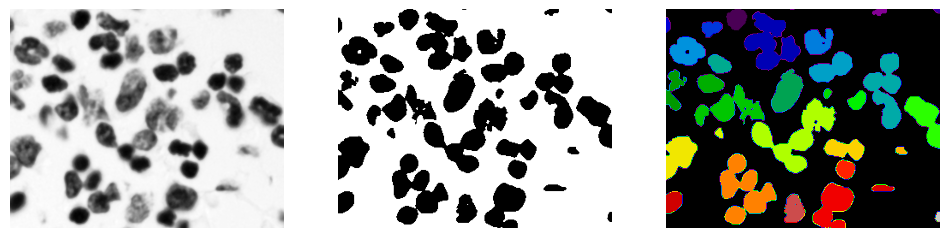

Threshold: 0.45


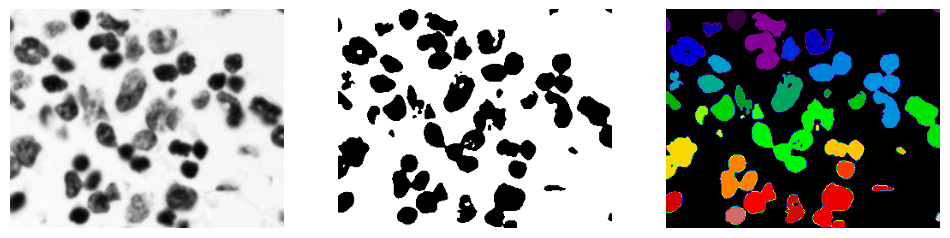

Threshold: 0.5


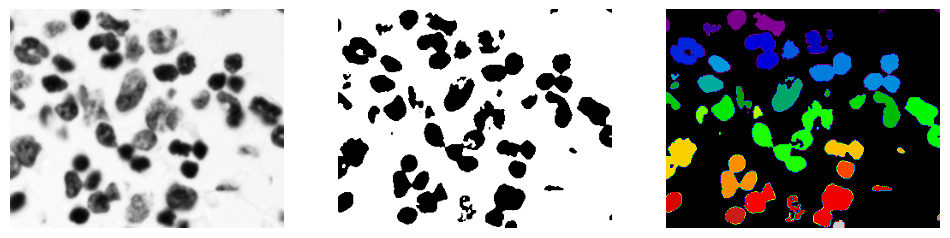

Threshold: 0.55


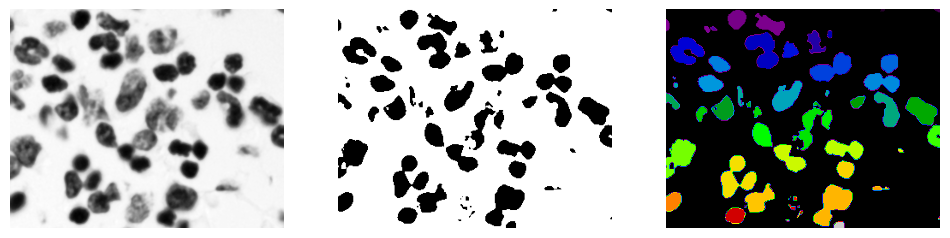

Threshold: 0.6


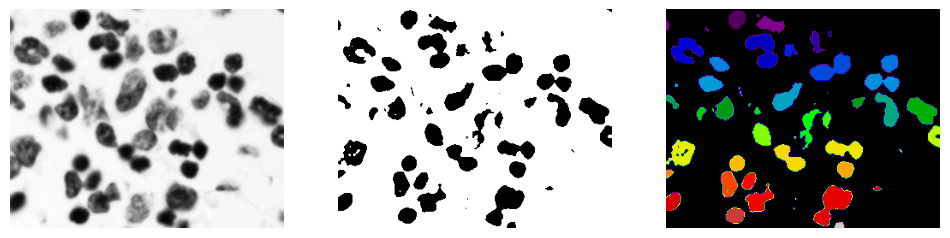

Threshold: 0.65


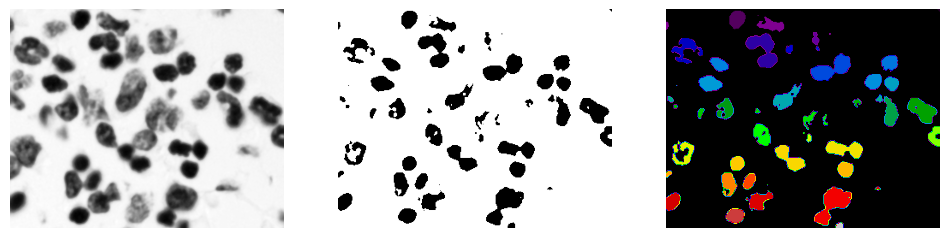

Threshold: 0.7


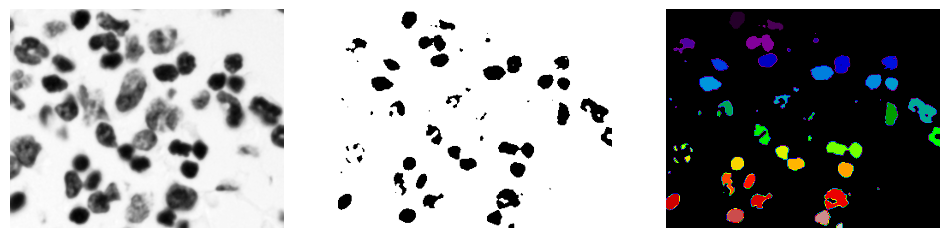

Threshold: 0.75


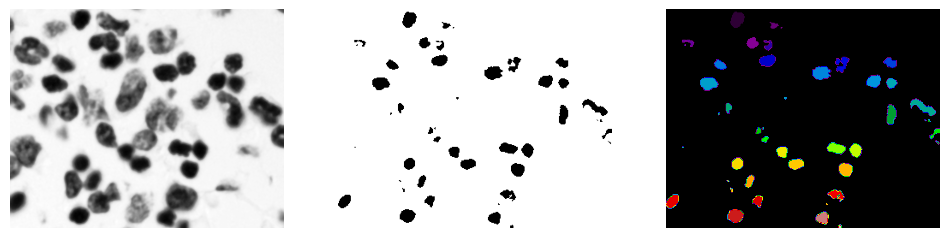

Threshold: 0.8


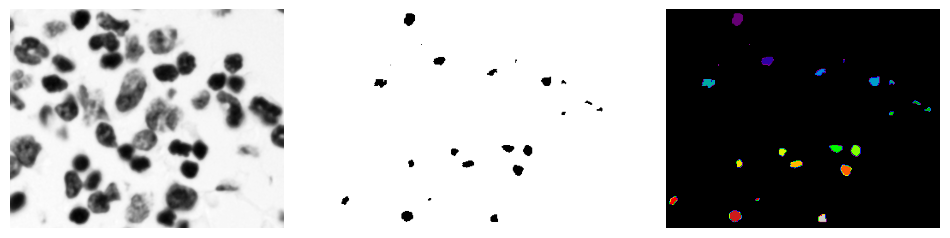

Threshold: 0.85


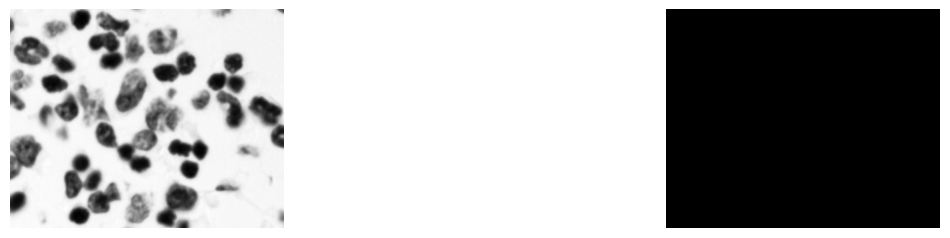

Threshold: 0.9


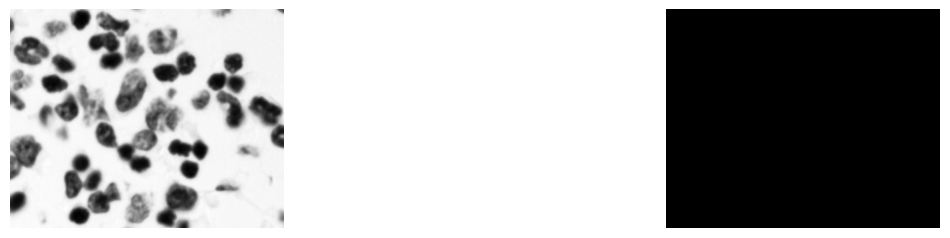

Threshold: 0.95


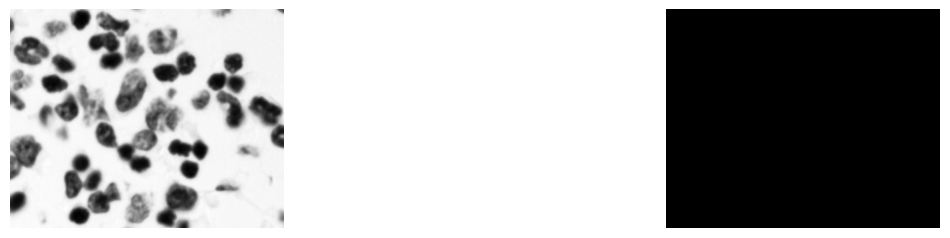

Threshold: 1.0


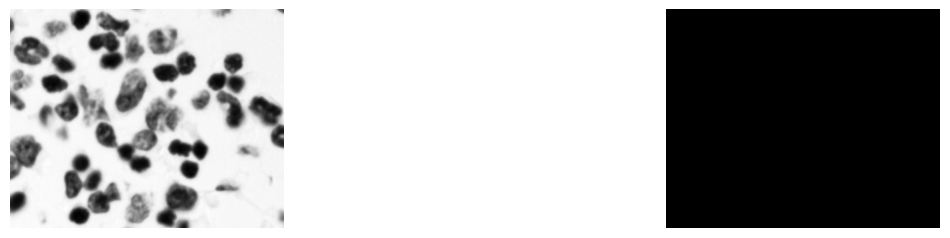

In [184]:
# Initialize an empty list to store the numbers
thr_list = []

# Loop through values from start to end with a step of 0.05
for i in range(int((1 - 0.1) / 0.05) + 1):
    # Calculate the value using the current index and step size
    value = 0.1 + (i * 0.05)
    value = round(value,2)
    thr_list.append(value)

for threshold in thr_list:
  thresholded_image = grey_image > threshold 
  cells_labels = skimage.measure.label(thresholded_image)
  print (f"Threshold: {threshold}")
  show_three_images(grey_image, thresholded_image, cells_labels)

Let's plot a histogram of image values to see whether there is a good cutoff between background and objects

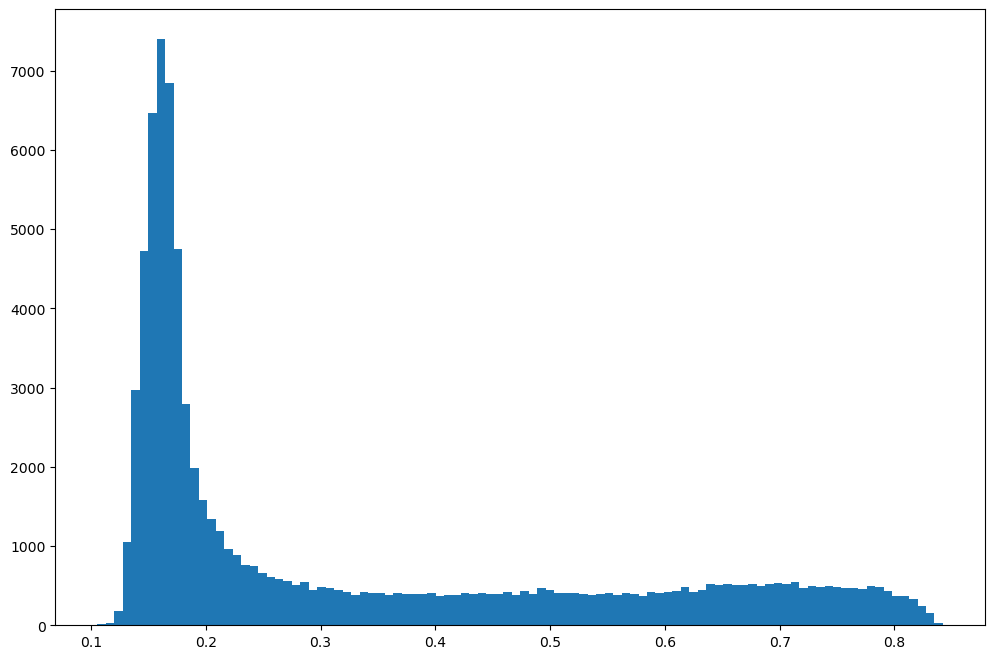

In [162]:
plt.hist(grey_image.flatten(), bins=100)
plt.show()

Doesn't loook like we can define a clear threshold here. Let's try more sophisticated methods

**TASK** : Smooth the image with Gaussian filter (`skimage.filters.gaussian`) and try different thresholds again. Does it look better?

In [185]:
def show_gaussian(image1, image2):
    f, axarr = plt.subplots(1, 2)   # We need two images in a row
    axarr[0].imshow(image1, cmap="Greys")
    axarr[1].imshow(image2, cmap="Greys") 
    for ax in axarr:  
      ax.axis('off')   # Remove the axis ticks
    plt.show()

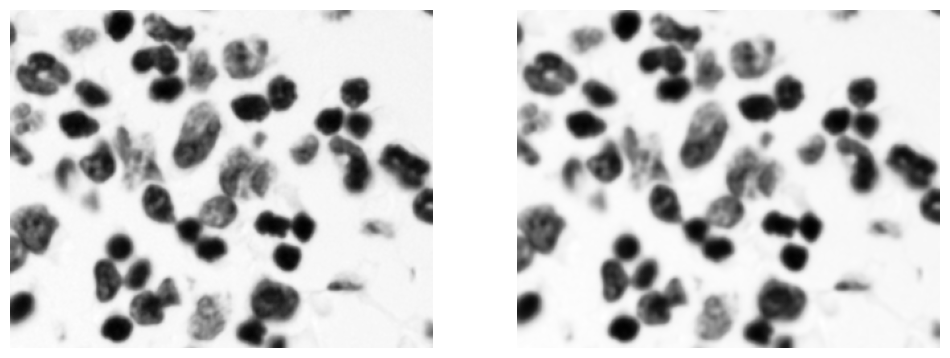

In [186]:
gaussian_smoothed_image = skimage.filters.gaussian(grey_image)
show_gaussian(grey_image, gaussian_smoothed_image)

The object boundaries look smoother, but there are still many objects we are not able to split fully.

**TASK** : take a look at other thresholding methods offered by skimage. Hint: many of them can be visualized with `skimage.filters.try_all_threshold`

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 800x500 with 8 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Isodata'}>,
        <Axes: title={'center': 'Li'}>, <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Minimum'}>,
        <Axes: title={'center': 'Otsu'}>,
        <Axes: title={'center': 'Triangle'}>,
        <Axes: title={'center': 'Yen'}>], dtype=object))

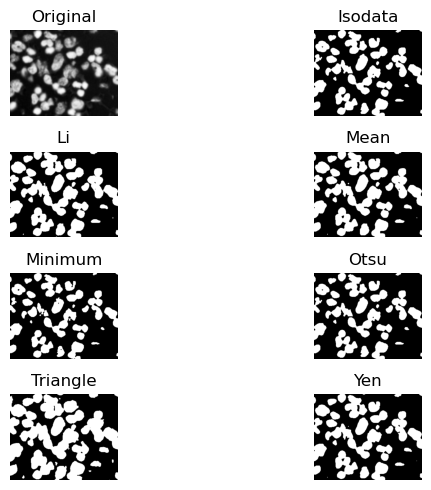

In [173]:
skimage.filters.try_all_threshold(gaussian_smoothed_image)



## Morphological Transformations
The masks we got out of tresholding look suboptimal. There are small objects and some masks are merged together. We can try to alleviate there problems with such morphological transformation as opening - errosion followed by dilation (a good explanation [here](https://www.youtube.com/watch?v=uUweXBmm978)).

Let's see how it looks like.

Threshold: 0.65
Threshold: 0.4052036360771058


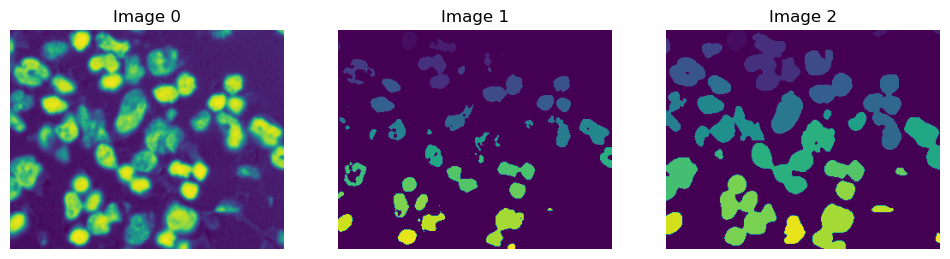

In [190]:
# Original thresholding method (cutoff)
threshold = 0.65
thresholded_image = grey_image > threshold 
cells_labels = skimage.measure.label(thresholded_image)
print (f"Threshold: {threshold}")

# On the step above Otsu thresholding seems like the best option
threshold = skimage.filters.threshold_otsu(gaussian_smoothed_image)
otsu_thresholded_image = gaussian_smoothed_image > threshold
cells_labels_otsu = skimage.measure.label(otsu_thresholded_image)
print (f"Threshold: {threshold}") 

img_list = [grey_image, cells_labels, cells_labels_otsu] #List of images to plot
show_images(img_list)

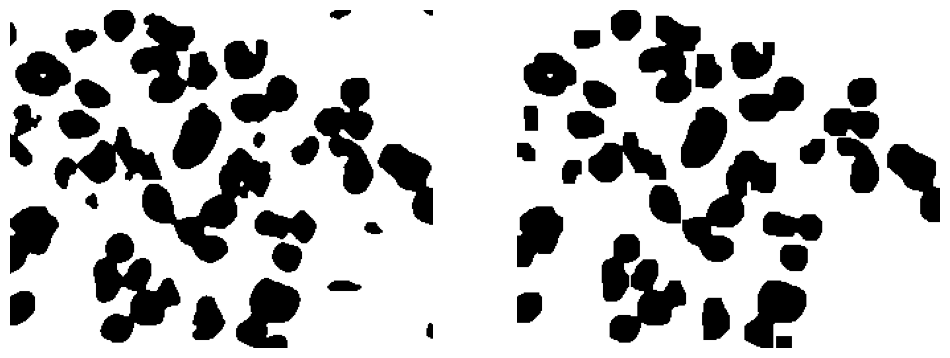

In [193]:
# We need to set a structuring element (https://www.youtube.com/watch?v=9lqH5XLI-V4)
kernel = np.ones((3,3), np.uint8)
opened_image = scipy.ndimage.binary_opening(otsu_thresholded_image, structure=kernel, iterations=4)
show_gaussian(otsu_thresholded_image, opened_image) # I am jsut using the show gaussian function given the grayscale colormap


As we can see, many small object disappeared and some objects got split, but not all.

**TASK**: try different number of iterations. How does it affect the segmentation masks? 

Iteration 1


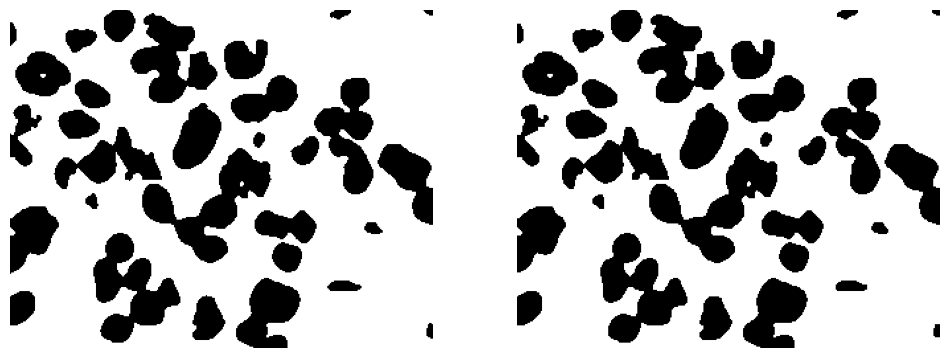

Iteration 2


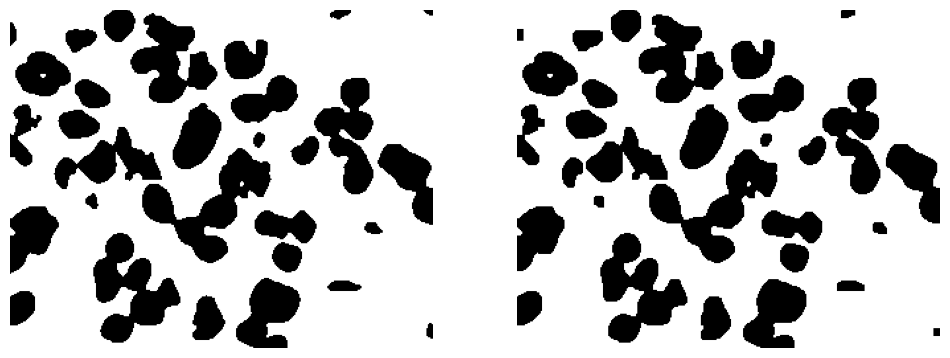

Iteration 3


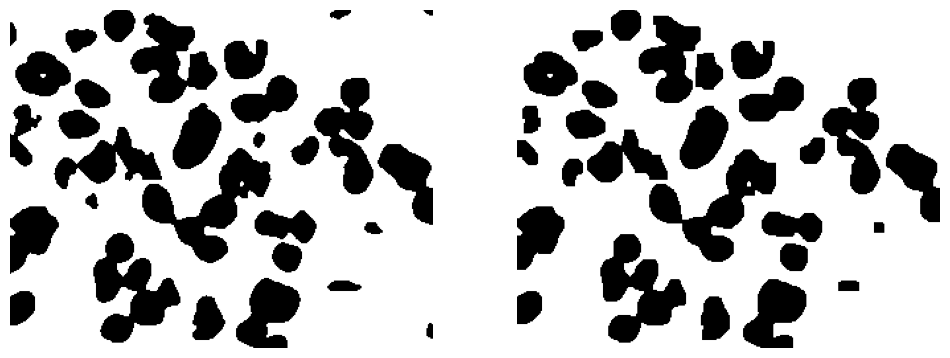

Iteration 4


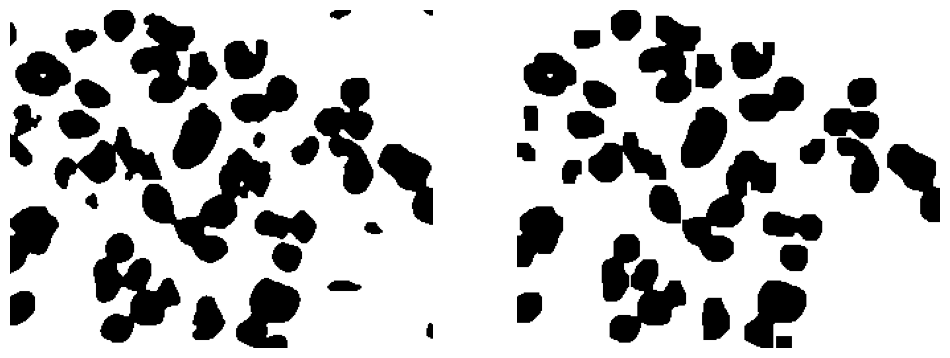

Iteration 5


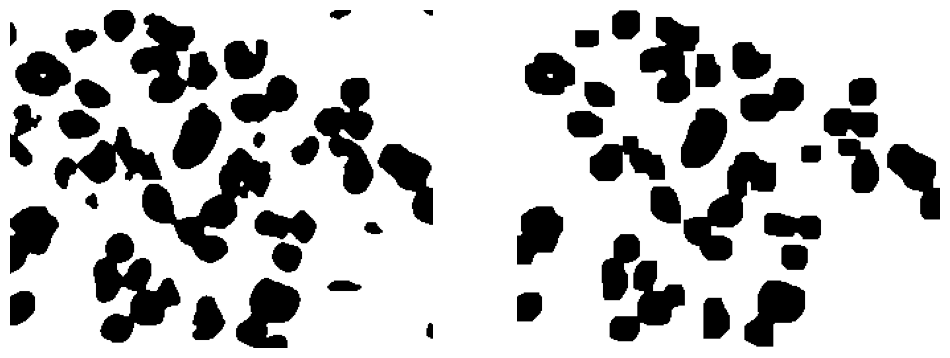

Iteration 6


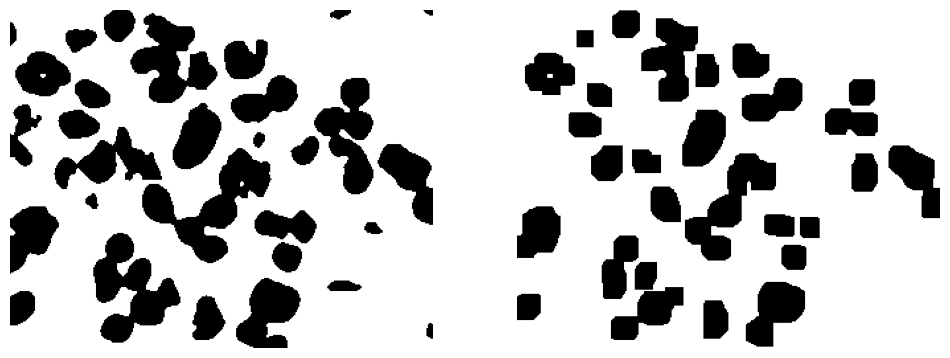

Iteration 7


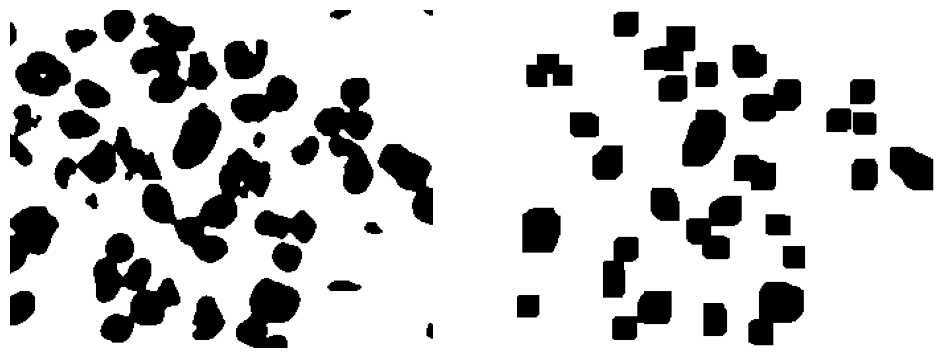

Iteration 8


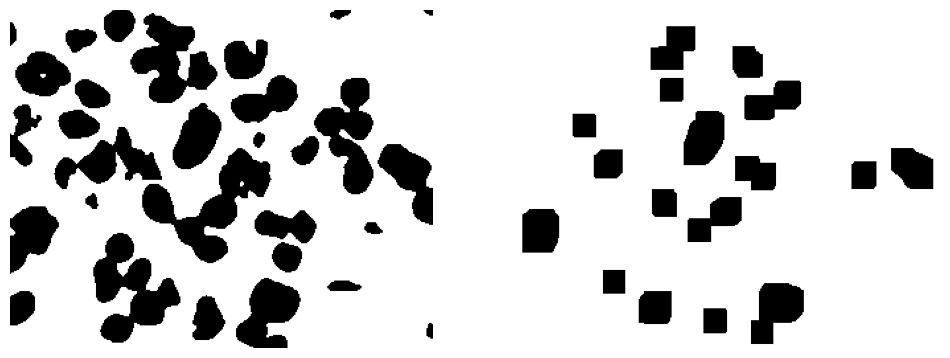

Iteration 9


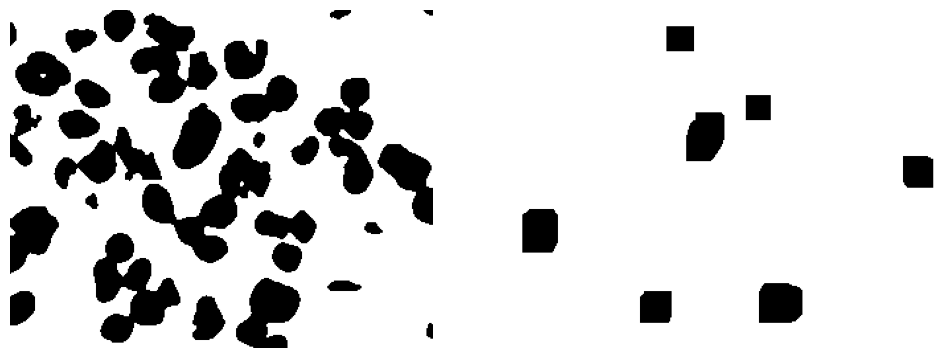

In [194]:
for n in range(1,10):
  opened_image = scipy.ndimage.binary_opening(otsu_thresholded_image, structure=kernel, iterations=n)
  print(f"Iteration {n}")
  show_gaussian(otsu_thresholded_image, opened_image)

**TASK**: Try closing (`scipy.ndimage.binary_closing`) to see what it does.

Iteration 1


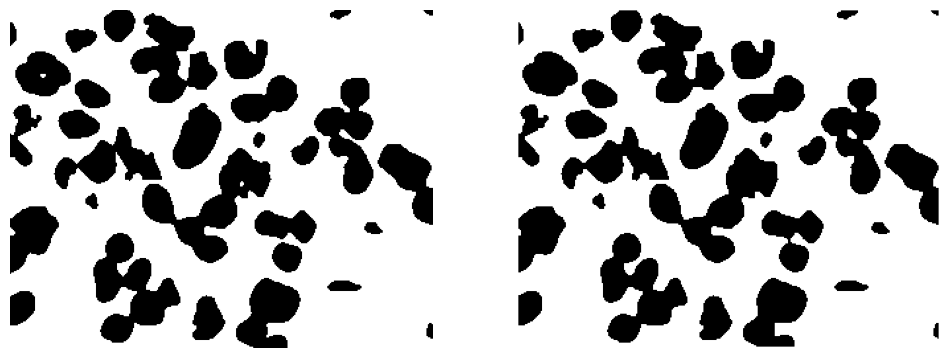

Iteration 2


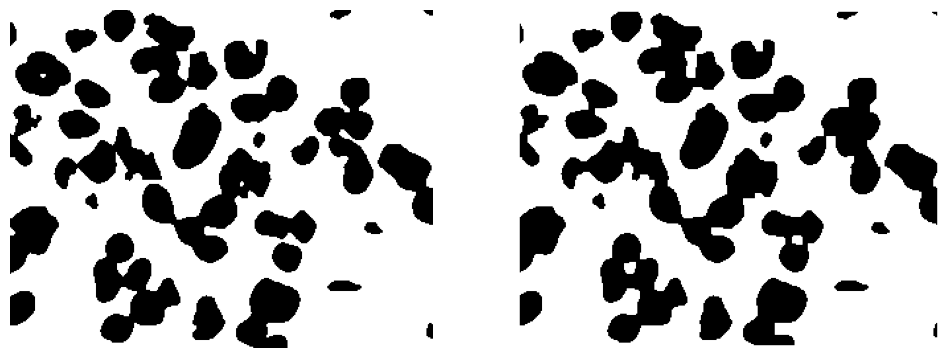

Iteration 3


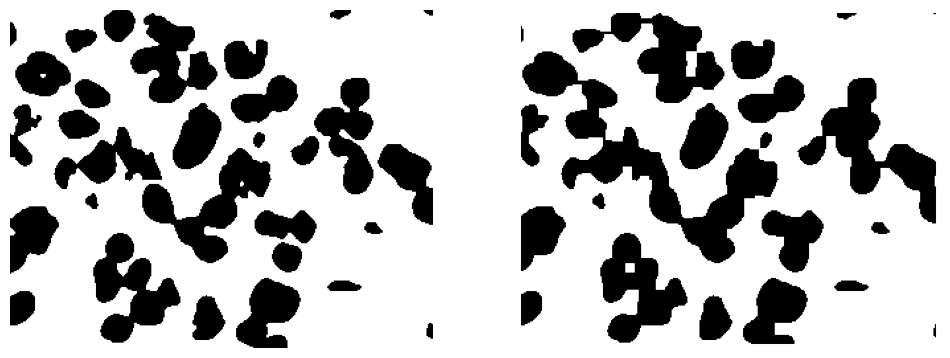

Iteration 4


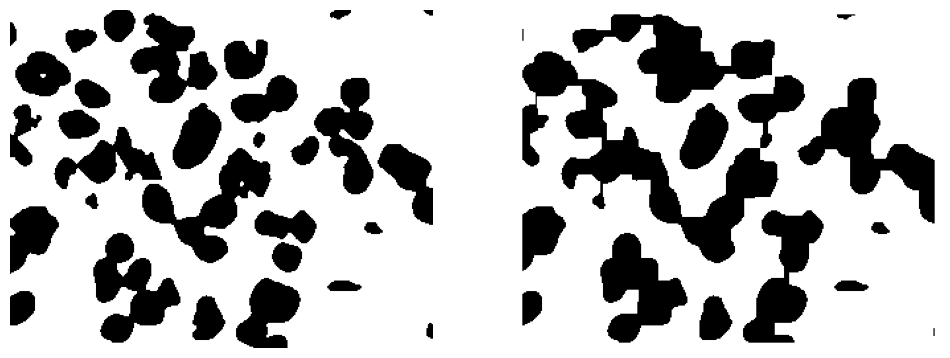

In [195]:
for n in range(1,5):
  closed_image = scipy.ndimage.binary_closing(otsu_thresholded_image, structure=kernel, iterations=n)
  print(f"Iteration {n}")
  show_gaussian(otsu_thresholded_image, closed_image)

## Finding edges 
We can also try to use image gradients to detect object edges. Let's try to use the [Canny algorithm](https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#edge-based-segmentation). 

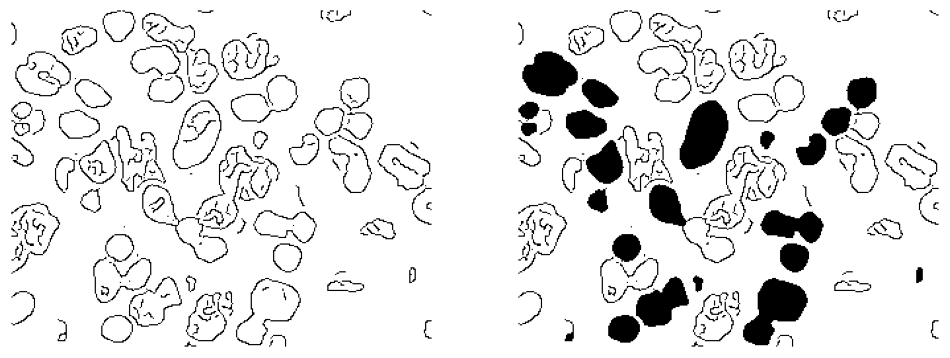

In [196]:
canny_edges = skimage.feature.canny(grey_image, sigma=1) # We get the object boundaries - 'edges'
filled_edges = scipy.ndimage.binary_fill_holes(canny_edges) # We fill the inner part to get full objects
show_gaussian(canny_edges, filled_edges)

While the boundaries seem relatively good, the resulting segmentation is far from perfect, because of the small holes in the boundaries. 

**TASK** : for the Canny detecton try different `sigma`, `low_threshold` and `high_threshold`. Does any combination give good object segmentation?


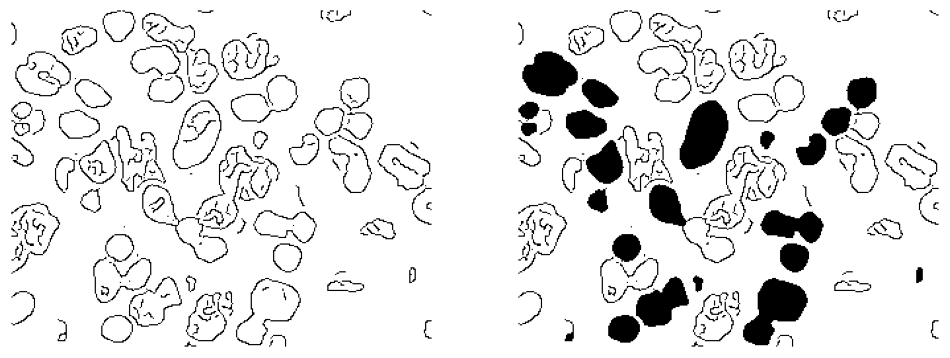

In [205]:
canny_edges = skimage.feature.canny(grey_image, low_threshold=0.1, high_threshold=0.2, sigma=1) # we get the object boundaries - 'edges'
filled_edges = scipy.ndimage.binary_fill_holes(canny_edges) # we fill the inner part to get full objects
show_gaussian(canny_edges, filled_edges)

**Advanced TASK**: segment the image with the watershed algorithm as described in the "Segment nuclei" part of the [Segment human cells tutorial](https://scikit-image.org/docs/dev/auto_examples/applications/plot_human_mitosis.html#segment-nuclei).

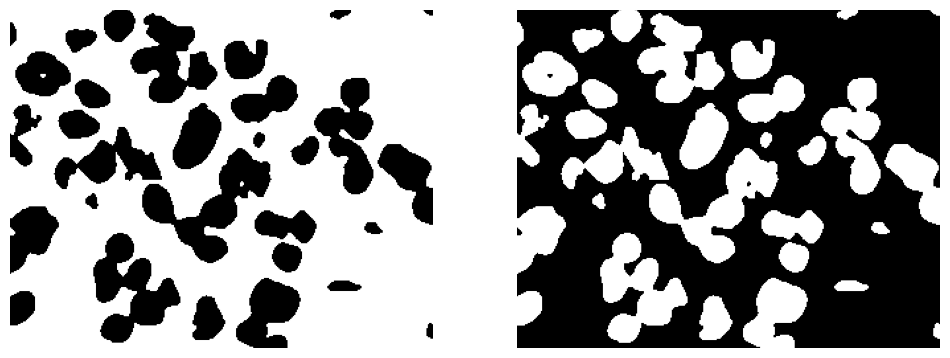

In [208]:
otsu_invert = 1 - otsu_thresholded_image
show_gaussian(otsu_thresholded_image, otsu_invert)

In [ ]:
def show_three_images(image1, image2, image3):
    f, axarr = plt.subplots(1, 3)   # We need two images in a row
    axarr[0].imshow(image1, cmap="Greys")
    axarr[1].imshow(image2, cmap="Greys")
    axarr[2].imshow(image3, cmap="nipy_spectral") # Task: change the cmap parameter in imshow function to display the second image in "nipy_spectral" colormap)
    for ax in axarr:  
      ax.axis('off')   # Remove the axis ticks
    plt.show()

In [219]:
from scipy import ndimage as ndi
from skimage import (color, segmentation)

# This line calculates the Euclidean distance transform of the otsu_thresholded_image.
# The distance transform assigns each pixel a value corresponding to the distance to the nearest object boundary.
distance = ndi.distance_transform_edt(otsu_thresholded_image)

# Here, the peak_local_max function from scikit-image is used to identify the local maxima in the distance-transformed image. 
# The min_distance parameter specifies the minimum distance between the identified peaks.
local_max_coords = skimage.feature.peak_local_max(distance, min_distance=7)

# This line creates a boolean mask, local_max_mask, with the same shape as the distance-transformed image.
local_max_mask = np.zeros(distance.shape, dtype=bool)
# The identified local maxima coordinates are used to set the corresponding positions in the local_max_mask as True, indicating the presence of a local maximum.
local_max_mask[tuple(local_max_coords.T)] = True
# The label function from scikit-image's measure module is used to label the connected components in the local_max_mask. 
# Each connected component is assigned a unique integer label.
markers = skimage.measure.label(local_max_mask)

# The watershed algorithm from scikit-image's segmentation module is applied to segment the nuclei. 
# The -distance image acts as the gradient, markers are used as the initial markers for the watershed
# otsu_thresholded_image is used as the mask to restrict the segmentation to the areas identified by the thresholding.
segmented_nuclei = segmentation.watershed(-distance, markers, mask=otsu_thresholded_image)

In [247]:
print(np.unique(otsu_thresholded_image)) # Otsu thresholded image and local_max_mask are Boolean arrays (True or False)
print(np.unique(local_max_mask))
print(np.unique(markers)) # markers asign a unique value to each connected component

[False  True]
[False  True]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


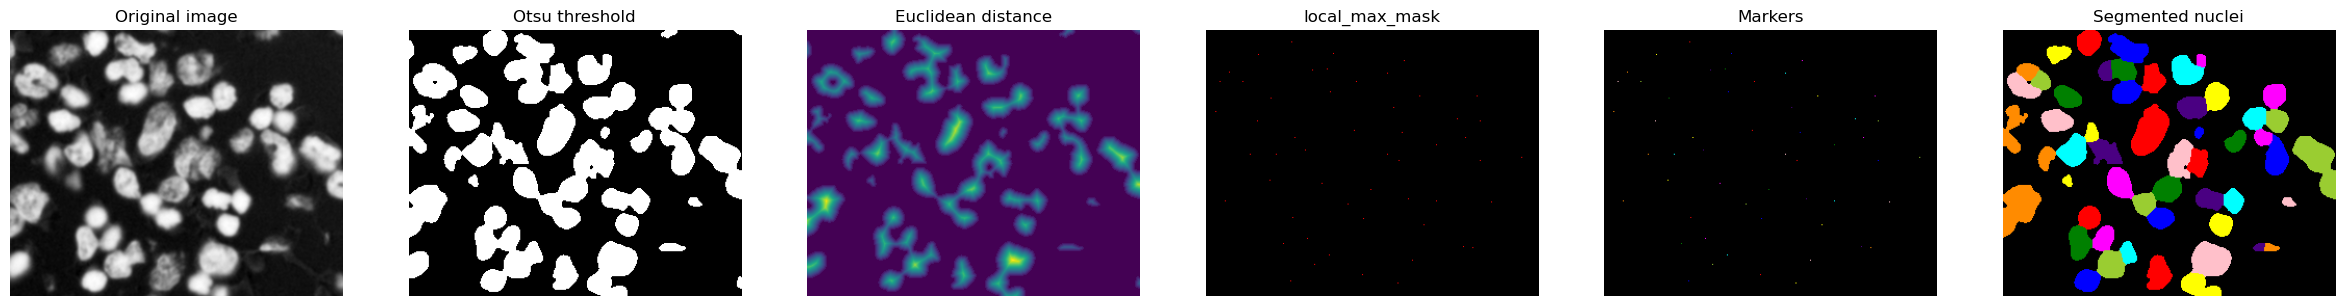

In [239]:
# Plot all the above defined variables

fig, ax = plt.subplots(ncols=6, figsize=(30, 15))
ax[0].imshow(grey_image, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(otsu_thresholded_image, cmap='gray')
ax[1].set_title('Otsu threshold')
ax[1].axis('off')
ax[2].imshow(distance)
ax[2].set_title('Euclidean distance')
ax[2].axis('off')
ax[3].imshow(color.label2rgb(local_max_mask, bg_label=0))
ax[3].set_title('local_max_mask')
ax[3].axis('off')
ax[4].imshow(color.label2rgb(markers, bg_label=0))
ax[4].set_title('Markers')
ax[4].axis('off')
ax[5].imshow(color.label2rgb(segmented_nuclei, bg_label=0))
ax[5].set_title('Segmented nuclei')
ax[5].axis('off')
plt.show()